In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Jul 21 15:54:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    35W /  70W |   4908MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import time 

In [ ]:
# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 50
optimizer = Adam()
validation_split = 0.2
verbosity = 1

In [ ]:
# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

In [ ]:

model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])


In [ ]:
start = time.time()
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)
end = time.time()
print(f"time :{start-end}")


Epoch 1/50
800/800 [==============================] - 4s 4ms/step - loss: 1.5915 - accuracy: 0.4161 - val_loss: 1.2786 - val_accuracy: 0.5477
Epoch 2/50
800/800 [==============================] - 3s 4ms/step - loss: 1.1800 - accuracy: 0.5806 - val_loss: 1.1223 - val_accuracy: 0.6044
Epoch 3/50
800/800 [==============================] - 3s 4ms/step - loss: 1.0049 - accuracy: 0.6448 - val_loss: 1.0564 - val_accuracy: 0.6314
Epoch 4/50
800/800 [==============================] - 3s 4ms/step - loss: 0.8755 - accuracy: 0.6893 - val_loss: 0.9846 - val_accuracy: 0.6603
Epoch 5/50
800/800 [==============================] - 3s 4ms/step - loss: 0.7797 - accuracy: 0.7276 - val_loss: 0.8711 - val_accuracy: 0.7005
Epoch 6/50
800/800 [==============================] - 3s 4ms/step - loss: 0.6992 - accuracy: 0.7543 - val_loss: 0.8488 - val_accuracy: 0.7122
Epoch 7/50
800/800 [==============================] - 3s 4ms/step - loss: 0.6320 - accuracy: 0.7784 - val_loss: 0.9017 - val_accuracy: 0.6960
Epoch 

In [ ]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 2.391887664794922 / Test accuracy: 0.6930999755859375


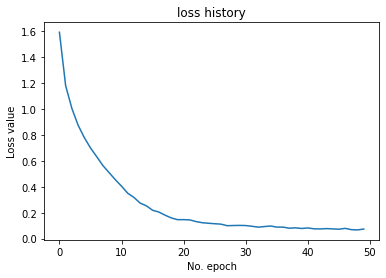

In [ ]:
plt.plot(history.history['loss'])
plt.title('loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

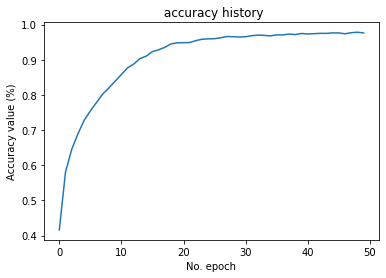

In [ ]:
plt.plot(history.history['accuracy'])
plt.title(' accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

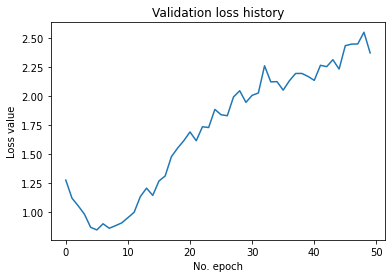

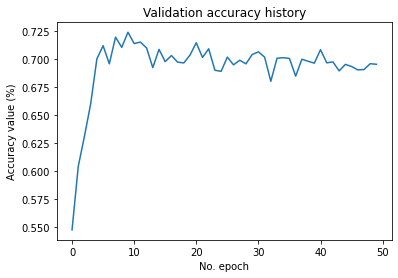

In [ ]:
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()